# Face Recognition

Ahmed Amer, Nicholas Lee, Christian Valdez

we are using the ATT face database in the data folder

methods are implemented and compared in the following order:
- MLP with LBP
- MLP without LBP
- SVM wiht LBP
- SVM without LBP

## Importing Data

In [1]:
import os
from glob import glob

from skimage.io import imread
from skimage.feature import local_binary_pattern

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#constants
NUM_OF_SUBJECT = 40
NUM_OF_SAMPLES_PER_SUBJECT = 10

## LBP

Image preprocessing using LBP (Local Binary Pattern) and without LBP

we will make 4 models total, 2 using LBP and 2 using images as given

In [3]:
def read_pgm(dataset_path: str):
    '''reads pgm file'''

    try:
        # print(f'reading {dataset_path}')
        # img = cv2.imread(dataset_path, 1)
        img = imread(dataset_path, as_gray=True)

    except Exception as error:
        print(f'{error}: {dataset_path} not found, skipping')

    else:
        return img

    
def make_gallery(path_prefix: str, pgm_filename: list[int], number_of_bins=16, number_of_points=12, radius_of_circle=3, showimage=False) -> list:
    '''

        Description
        ================================================
        creates gallery of lbp and labels
        
        ...

        calls the function read_pgm to read pgm file using imread from skimage
        returns list of lbp and list of labels

        Variable Description
        ================================================
        P:                  Number of circularly symmetric neighbor set points
        Q:                  Radius of circle
        subject_samples:    list of paths

    '''

    filename_start = pgm_filename[0]
    filename_end = pgm_filename[1]

    # LBP parameters
    p = number_of_points      # number of points (higher means more detailed and fine grained))
    q = radius_of_circle       #radius of circle

    subject_samples = [f'{path_prefix}/{sample_number}.pgm' for sample_number in range(filename_start, filename_end)]

    lbp_gallery = []
    labels = []

    for sample in subject_samples:
        sample_id = sample.split('/')
        id = sample_id[2][1:]
        sample_id_indx = sample_id[-1].replace('.pgm', '')

        img = read_pgm(sample)
        lbp = local_binary_pattern(img, p, q)

        # lbp_gallery.append(lbp)
        # labels.append(f'{id}')
        num_bins = number_of_bins
        hist, _ = np.histogram(lbp.ravel(), bins=num_bins, range=(0, num_bins))
        lbp_gallery.append(hist)
        labels.append(int(id))

        if showimage:
            plt.imshow(img, cmap='gray')
            plt.imshow(lbp)
    
    return np.array(lbp_gallery), np.array(labels)

def make_gallery_withoutLBP(path_prefix: str, pgm_filename: list[int], showimage=False) -> list:
    '''

        Description
        ================================================
        creates gallery of images and labels
        
        ...

        calls the function read_pgm to read pgm file using imread from skimage
        returns list of images and list of labels

        Variable Description
        ================================================
        subject_samples:    list of paths

    '''

    filename_start = pgm_filename[0]
    filename_end = pgm_filename[1]

    subject_samples = [f'{path_prefix}/{sample_number}.pgm' for sample_number in range(filename_start, filename_end)]

    image_gallery = []
    labels = []

    for sample in subject_samples:
        sample_id = sample.split('/')
        id = sample_id[2][1:]
        sample_id_indx = sample_id[-1].replace('.pgm', '')

        img = read_pgm(sample)

        image_gallery.append(img)

        labels.append(int(id))
        
        if showimage:
            plt.imshow(img, cmap='gray')
    
    return np.array(image_gallery)[:,:,0], np.array(labels)





[1 1 1 1 1]
(16,)
(5,)


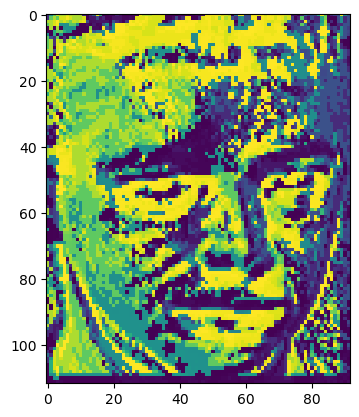

In [4]:
#testing functions above

# function with LBP

train_path = './Data/s'

for subject in range(1, NUM_OF_SUBJECT + 1):
    '''
        TODO: test for one subject and make sure it's right
    '''
    path_prefix = f'{train_path}{subject}'
    
    train_data, train_label = make_gallery(path_prefix, [1, NUM_OF_SAMPLES_PER_SUBJECT//2+1], showimage=True)
    test_data, test_label = make_gallery(path_prefix, [NUM_OF_SAMPLES_PER_SUBJECT//2+1, NUM_OF_SAMPLES_PER_SUBJECT+1], showimage=True)
    print(test_label)
    print(train_data[0].shape)
    print(test_label.shape)
    
    break


[1 1 1 1 1]
(112,)


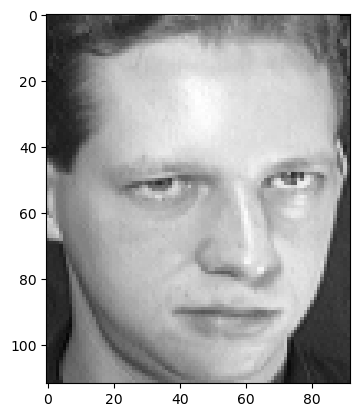

In [5]:
# funciton without LBP

for subject in range(1, NUM_OF_SUBJECT + 1):
    '''
        TODO: test for one subject and make sure it's right
    '''
    path_prefix = f'{train_path}{subject}'
    
    train_data, train_label = make_gallery_withoutLBP(path_prefix, [1, NUM_OF_SAMPLES_PER_SUBJECT//2+1], showimage=True)
    test_data, test_label = make_gallery_withoutLBP(path_prefix, [NUM_OF_SAMPLES_PER_SUBJECT//2+1, NUM_OF_SAMPLES_PER_SUBJECT+1], showimage=True)
    print(test_label)
    print(train_data[0].shape)
    
    break

## Neural Networks - MLP

#### MLP using LBP

##### baseline

LBP parameters
number_of_points = 12
radius_of_circle = 3
number_of_bins = 16

MLP parameters
hidden_layer_sizes = (128, 64, 128)
learning_rate_init = 0.001
random_state = 1

In [6]:
# Neural Network

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []

for subject in range(1, NUM_OF_SUBJECT+1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)




/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:  0.195
probability matrix


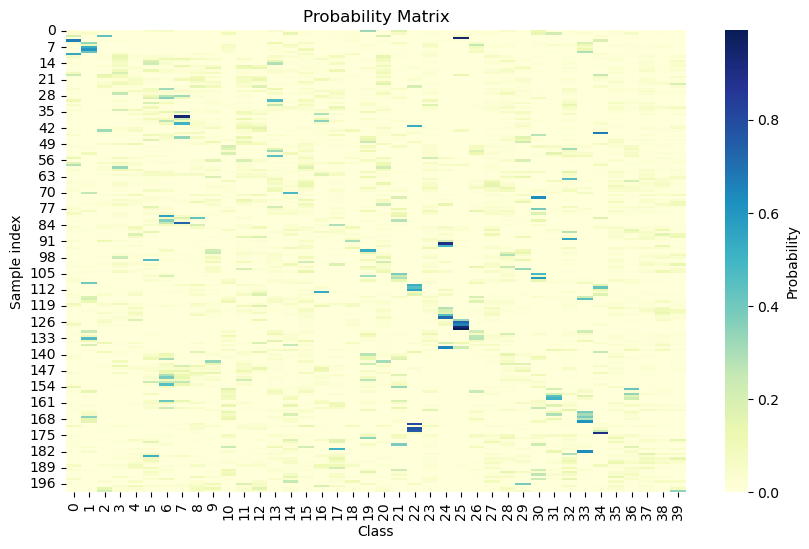

In [7]:
# create a MLPClassifier with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

# train the MLPClassifier on the training data
mlp.fit(train_data, train_label)

probability_matrix = mlp.predict_proba(test_data)

prediction = mlp.predict(test_data)

# calculate accuracy
accuracy = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy)

print("probability matrix")
plt.figure(figsize=(10, 6))
sns.heatmap(probability_matrix, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.xlabel("Class")
plt.ylabel("Sample index")
plt.title("Probability Matrix")
plt.show()

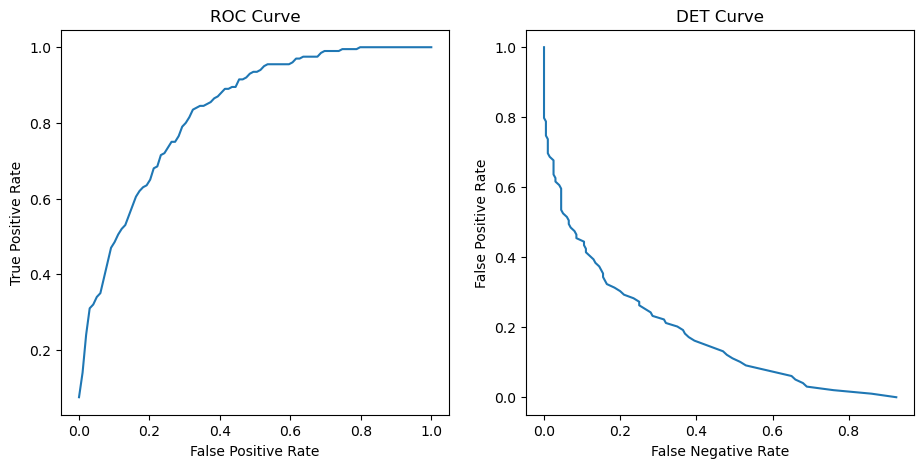

In [8]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

roc_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
roc_tpr = np.zeros((NUM_OF_SUBJECT, 100))    # true positive rate

det_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
det_fnr = np.zeros((NUM_OF_SUBJECT, 100))    # false negative rate

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Calculate binary labels for each subject
binary_labels = [np.where(np.array(test_label) == subject, 1, 0) for subject in range(1, NUM_OF_SUBJECT + 1)]

for i, subject_binary_labels in enumerate(binary_labels):
    fpr, tpr, _ = roc_curve(subject_binary_labels, probability_matrix[:, i])
    roc_fpr[i] = np.linspace(min(fpr), max(fpr), 100)
    roc_tpr[i] = np.interp(roc_fpr[i], fpr, tpr)

    fnr = 1 - tpr
    sorted_indices = np.argsort(fpr)
    sorted_fpr = fpr[sorted_indices]
    sorted_fnr = fnr[sorted_indices]
    det_fpr[i] = np.linspace(min(sorted_fpr), max(sorted_fpr), 100)
    det_fnr[i] = np.interp(det_fpr[i], sorted_fpr, sorted_fnr)

roc_mid_fpr = np.mean(roc_fpr, 0)
roc_mid_tpr = np.mean(roc_tpr, 0)
ax_roc.plot(roc_mid_fpr, roc_mid_tpr)

det_mid_fpr = np.mean(det_fpr, 0)
det_mid_fnr = np.mean(det_fnr, 0)
ax_det.plot(det_mid_fnr, det_mid_fpr)

ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve')

ax_det.set_xlabel('False Negative Rate') 
ax_det.set_ylabel('False Positive Rate') 
ax_det.set_title('DET Curve')

plt.show()


##### lets try to improve

optimize number of bins

In [9]:
# number_of_points = 12, radius_of_circle = 3, number_of_bins = 1 - 300


data_path = './Data/s'

accuracyList_withLBP_BIN = []

for num_bins in range(1, 300):
    if num_bins % 10 != 0:
        continue
    train_data = []
    train_label = []
    test_data = []
    test_label = []

    for subject in range(1, NUM_OF_SUBJECT + 1):

        path_prefix = f'{data_path}{subject}'

        # 60% of the data is used for training and 40% for testing
        subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], num_bins)
        subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], num_bins)

        train_data.extend(subject_train_data)
        train_label.extend(subject_train_label)
        test_data.extend(subject_test_data)
        test_label.extend(subject_test_label)

    # create a MLPClassifier with 3 hidden layers
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

    # train the MLPClassifier on the training data
    mlp.fit(train_data, train_label)

    probability_matrix = mlp.predict_proba(test_data)

    # calculate accuracy
    prediction = mlp.predict(test_data)
    accuracy = accuracy_score(test_label, prediction)
    
    accuracyList_withLBP_BIN.append((accuracy, num_bins))

    # print(f"Accuracy: {accuracy}") 

highest_accuracy_index = max(range(len(accuracyList_withLBP_BIN)), key=lambda i: accuracyList_withLBP_BIN[i][0])
best_bin = accuracyList_withLBP_BIN[highest_accuracy_index][1]
print("highest accuacy is {}, with number_of_bins {}".format(accuracyList_withLBP_BIN[highest_accuracy_index][0], accuracyList_withLBP_BIN[highest_accuracy_index][1]))



/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


highest accuacy is 0.59, with number_of_bins 290


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


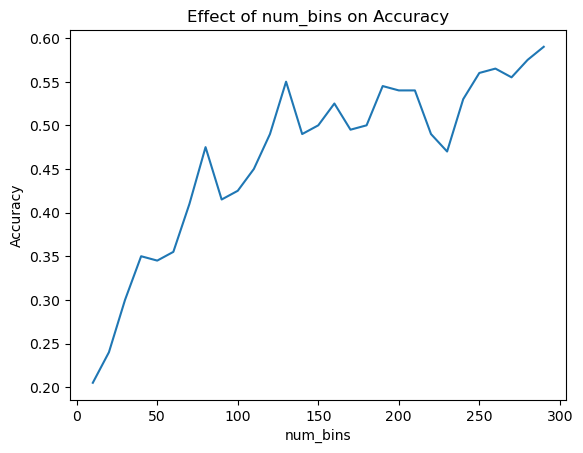

In [10]:
import matplotlib.pyplot as plt

# Extract the accuracies and num_bins from the accuracyList_withLBP_BIN list
accuracies = [tup[0] for tup in accuracyList_withLBP_BIN]
num_bins_list = [tup[1] for tup in accuracyList_withLBP_BIN]

# Plot the accuracies vs. num_bins using a line plot
plt.plot(num_bins_list, accuracies)
plt.xlabel('num_bins')
plt.ylabel('Accuracy')
plt.title('Effect of num_bins on Accuracy')
plt.show()


modifying LBP parameters

since the best number of bins was around 190, we will use that.

number_of_points = 9 - 16
radius_of_circle = 1 - 6

In [11]:
#constants

data_path = './Data/s'

accuracyList_withLBP_Params = []

for p in range(8, 14):
    for q in range(1, 7):
        train_data = []
        train_label = []
        test_data = []
        test_label = []

        for subject in range(1, NUM_OF_SUBJECT + 1):

            path_prefix = f'{data_path}{subject}'

            # 60% of the data is used for training and 40% for testing
            subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], best_bin, p, q,)
            subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], best_bin, p, q)

            train_data.extend(subject_train_data)
            train_label.extend(subject_train_label)
            test_data.extend(subject_test_data)
            test_label.extend(subject_test_label)

        # create a MLPClassifier with 3 hidden layers
        mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

        # train the MLPClassifier on the training data
        mlp.fit(train_data, train_label)

        probability_matrix = mlp.predict_proba(test_data)

        # calculate accuracy
        prediction = mlp.predict(test_data)
        accuracy = accuracy_score(test_label, prediction)
        accuracyList_withLBP_Params.append((accuracy, p, q))

        # print(f"Accuracy: {accuracy}")

highest_accuracy_index = max(range(len(accuracyList_withLBP_Params)), key=lambda i: accuracyList_withLBP_Params[i][0])
best_number_of_points = accuracyList_withLBP_Params[highest_accuracy_index][1]
best_radius_of_circle = accuracyList_withLBP_Params[highest_accuracy_index][2]
print("highest accuacy is {}, with p of {}, and q of {}".format(accuracyList_withLBP_Params[highest_accuracy_index][0], accuracyList_withLBP_Params[highest_accuracy_index][1], accuracyList_withLBP_Params[highest_accuracy_index][2]))





/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


highest accuacy is 0.675, with p of 11, and q of 5


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


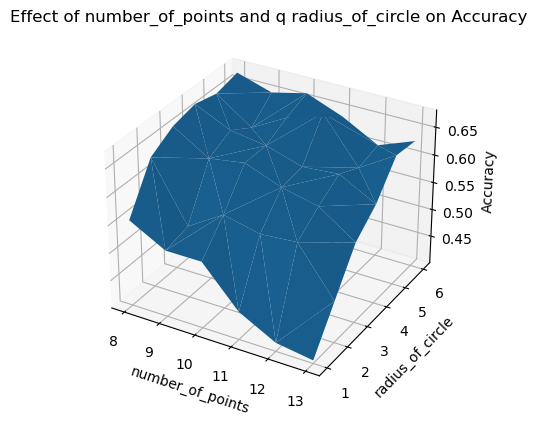

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Extract the accuracies, p, and q from the accuracyList_withLBP_Params list
accuracies = [tup[0] for tup in accuracyList_withLBP_Params]
p_list = [tup[1] for tup in accuracyList_withLBP_Params]
q_list = [tup[2] for tup in accuracyList_withLBP_Params]

# Create a 3D plot of the accuracies vs. p and q
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(p_list, q_list, accuracies)
ax.set_xlabel('number_of_points')
ax.set_ylabel('radius_of_circle')
ax.set_zlabel('Accuracy')
ax.set_title('Effect of number_of_points and q radius_of_circle on Accuracy')
plt.show()


##### using gridsearchcv with the best LBP and bins found

cv=5 - 5 fold cross validation

In [13]:
from sklearn.model_selection import GridSearchCV


data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []


for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], best_bin, best_number_of_points, best_radius_of_circle)
    subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], best_bin, best_number_of_points, best_radius_of_circle)

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256,), (64, 64), (128, 64), (128, 128), (256, 128), (128, 64, 128), (256, 64, 128)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1],
    'random_state': [1, 2, 3]
}

mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5)
grid_search.fit(train_data, train_label)

print("Best parameters: ", grid_search.best_params_)


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters:  {'hidden_layer_sizes': (256, 128), 'learning_rate_init': 0.01, 'random_state': 2}


In [14]:
# create a MLPClassifier with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), learning_rate_init=0.01, random_state=2)

# train the MLPClassifier on the training data
mlp.fit(train_data, train_label)

probability_matrix = mlp.predict_proba(test_data)

# calculate accuracy
prediction = mlp.predict(test_data)
accuracy_LBP_gridsearch = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy_LBP_gridsearch)

Accuracy:  0.62


### best MLP model found using LBP

In [15]:
train_data = []
train_label = []
test_data = []
test_label = []

for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], best_bin, best_number_of_points, best_radius_of_circle)
    subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], best_bin, best_number_of_points, best_radius_of_circle)

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

# create a MLPClassifier with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

# train the MLPClassifier on the training data
mlp.fit(train_data, train_label)

probability_matrix = mlp.predict_proba(test_data)

# calculate accuracy
prediction = mlp.predict(test_data)
accuracy = accuracy_score(test_label, prediction)

print("Accuracy: ", accuracy)

Accuracy:  0.675


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


probability matrix


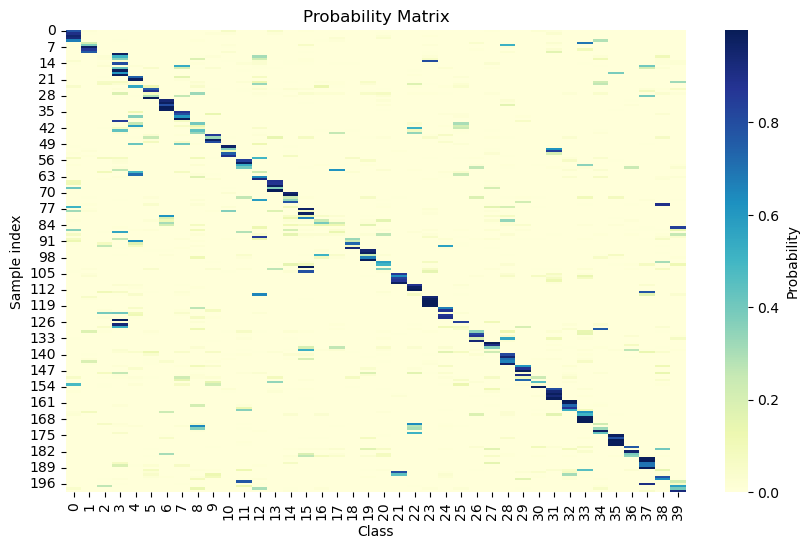

In [16]:
print("probability matrix")
plt.figure(figsize=(10, 6))
sns.heatmap(probability_matrix, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.xlabel("Class")
plt.ylabel("Sample index")
plt.title("Probability Matrix")
plt.show()

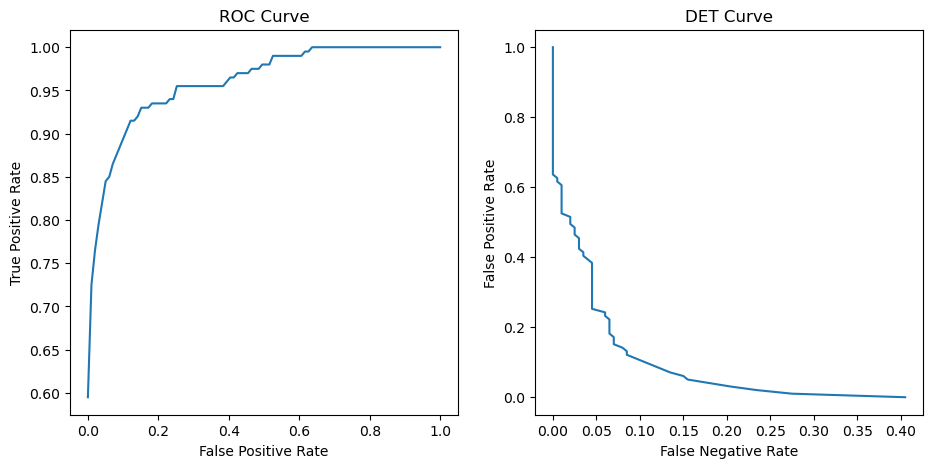

In [17]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

roc_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
roc_tpr = np.zeros((NUM_OF_SUBJECT, 100))    # true positive rate

det_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
det_fnr = np.zeros((NUM_OF_SUBJECT, 100))    # false negative rate

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Calculate binary labels for each subject
binary_labels = [np.where(np.array(test_label) == subject, 1, 0) for subject in range(1, NUM_OF_SUBJECT + 1)]

for i, subject_binary_labels in enumerate(binary_labels):
    fpr, tpr, _ = roc_curve(subject_binary_labels, probability_matrix[:, i])
    roc_fpr[i] = np.linspace(min(fpr), max(fpr), 100)
    roc_tpr[i] = np.interp(roc_fpr[i], fpr, tpr)

    fnr = 1 - tpr
    sorted_indices = np.argsort(fpr)
    sorted_fpr = fpr[sorted_indices]
    sorted_fnr = fnr[sorted_indices]
    det_fpr[i] = np.linspace(min(sorted_fpr), max(sorted_fpr), 100)
    det_fnr[i] = np.interp(det_fpr[i], sorted_fpr, sorted_fnr)

roc_mid_fpr = np.mean(roc_fpr, 0)
roc_mid_tpr = np.mean(roc_tpr, 0)
ax_roc.plot(roc_mid_fpr, roc_mid_tpr)

det_mid_fpr = np.mean(det_fpr, 0)
det_mid_fnr = np.mean(det_fnr, 0)
ax_det.plot(det_mid_fnr, det_mid_fpr)

ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve')

ax_det.set_xlabel('False Negative Rate')
ax_det.set_ylabel('False Positive Rate')
ax_det.set_title('DET Curve')

plt.show()


## MLP without LBP

lets calcuates a baseline

In [18]:

data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []

for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery_withoutLBP(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery_withoutLBP(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

In [19]:
# create a MLPClassifier with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

# train the MLPClassifier on the training data
mlp.fit(train_data, train_label)

probability_matrix = mlp.predict_proba(test_data)

# calculate accuracy
prediction = mlp.predict(test_data)
accuracy = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.31


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
#constants

data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []


for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery_withoutLBP(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery_withoutLBP(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256,), (64, 64), (128, 64), (128, 128), (256, 128), (128, 64, 128), (256, 64, 128)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1],
    'random_state': [1, 2, 3]
}

mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5)
grid_search.fit(train_data, train_label)

print("Best parameters: ", grid_search.best_params_)


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters:  {'hidden_layer_sizes': (256, 64, 128), 'learning_rate_init': 0.001, 'random_state': 2}


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Best MLP model found without LBP

In [21]:
# create a MLPClassifier with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), learning_rate_init=0.01, random_state=1)

# train the MLPClassifier on the training data
mlp.fit(train_data, train_label)

probability_matrix = mlp.predict_proba(test_data)

# calculate accuracy
prediction = mlp.predict(test_data)

# calculate the accuracy of the MLPClassifier
accuracy_NO_LBP_gridsearch = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy_LBP_gridsearch)

Accuracy:  0.62


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


probability matrix


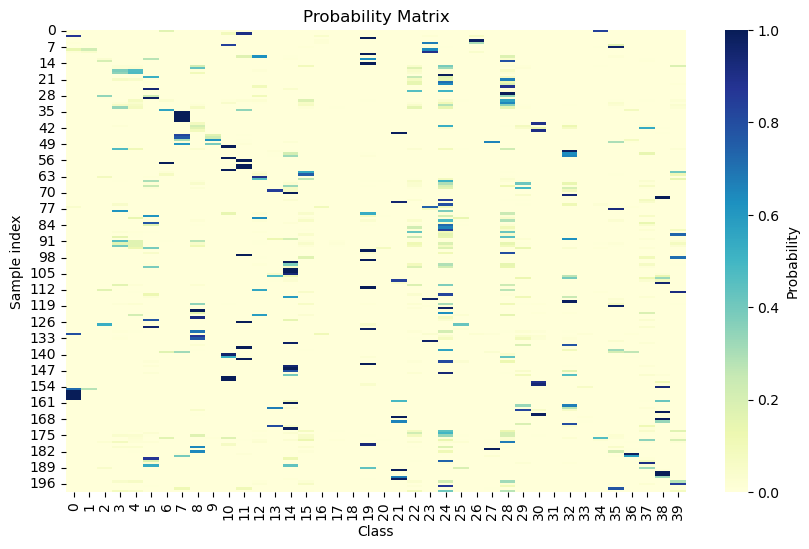

In [22]:
print("probability matrix")
plt.figure(figsize=(10, 6))
sns.heatmap(probability_matrix, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.xlabel("Class")
plt.ylabel("Sample index")
plt.title("Probability Matrix")
plt.show()

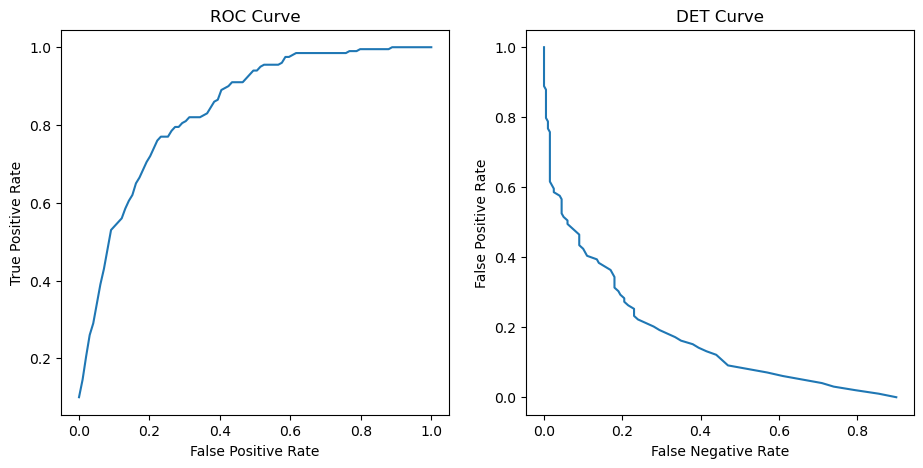

In [23]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

roc_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
roc_tpr = np.zeros((NUM_OF_SUBJECT, 100))    # true positive rate

det_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
det_fnr = np.zeros((NUM_OF_SUBJECT, 100))    # false negative rate

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Calculate binary labels for each subject
binary_labels = [np.where(np.array(test_label) == subject, 1, 0) for subject in range(1, NUM_OF_SUBJECT + 1)]

for i, subject_binary_labels in enumerate(binary_labels):
    fpr, tpr, _ = roc_curve(subject_binary_labels, probability_matrix[:, i])
    roc_fpr[i] = np.linspace(min(fpr), max(fpr), 100)
    roc_tpr[i] = np.interp(roc_fpr[i], fpr, tpr)

    fnr = 1 - tpr
    sorted_indices = np.argsort(fpr)
    sorted_fpr = fpr[sorted_indices]
    sorted_fnr = fnr[sorted_indices]
    det_fpr[i] = np.linspace(min(sorted_fpr), max(sorted_fpr), 100)
    det_fnr[i] = np.interp(det_fpr[i], sorted_fpr, sorted_fnr)

roc_mid_fpr = np.mean(roc_fpr, 0)
roc_mid_tpr = np.mean(roc_tpr, 0)
ax_roc.plot(roc_mid_fpr, roc_mid_tpr)

det_mid_fpr = np.mean(det_fpr, 0)
det_mid_fnr = np.mean(det_fnr, 0)
ax_det.plot(det_mid_fnr, det_mid_fpr)

ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve')

ax_det.set_xlabel('False Negative Rate')
ax_det.set_ylabel('False Positive Rate')
ax_det.set_title('DET Curve')

plt.show()


## SVM

train model using LBP

train model using images

### SVM with LBP

#### baseline

In [25]:
#svm

data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []

for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

In [26]:
from sklearn.svm import SVC

svm = SVC(C=5.0, gamma=0.001, probability=True)
svm.fit(train_data, train_label)

probability_matrix = svm.predict_proba(test_data)

# calculate accuracy
prediction = svm.predict(test_data)
accuracy = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.36


probability matrix


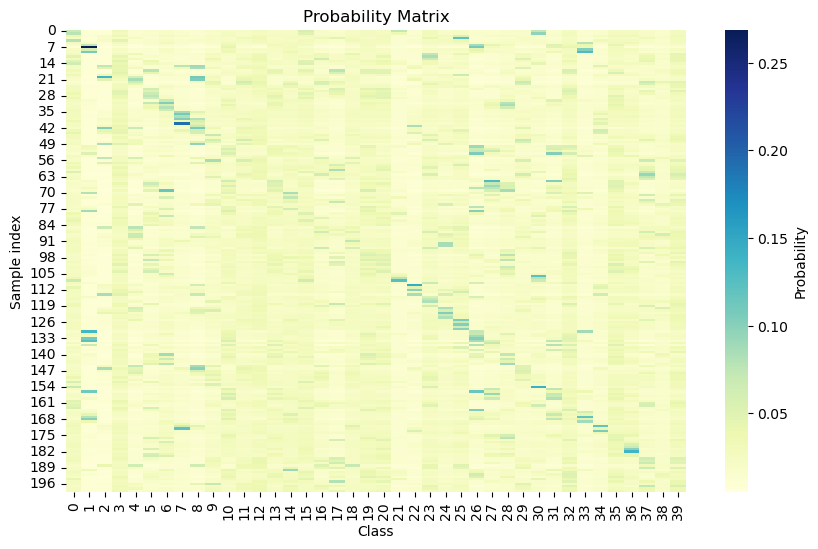

In [27]:
print("probability matrix")
plt.figure(figsize=(10, 6))
sns.heatmap(probability_matrix, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.xlabel("Class")
plt.ylabel("Sample index")
plt.title("Probability Matrix")
plt.show()

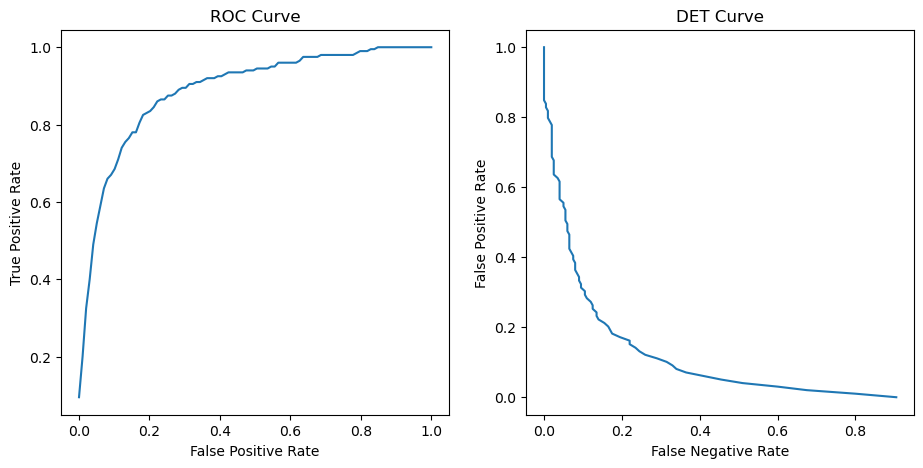

In [28]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

roc_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
roc_tpr = np.zeros((NUM_OF_SUBJECT, 100))    # true positive rate

det_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
det_fnr = np.zeros((NUM_OF_SUBJECT, 100))    # false negative rate

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Calculate binary labels for each subject
binary_labels = [np.where(np.array(test_label) == subject, 1, 0) for subject in range(1, NUM_OF_SUBJECT + 1)]

for i, subject_binary_labels in enumerate(binary_labels):
    fpr, tpr, _ = roc_curve(subject_binary_labels, probability_matrix[:, i])
    roc_fpr[i] = np.linspace(min(fpr), max(fpr), 100)
    roc_tpr[i] = np.interp(roc_fpr[i], fpr, tpr)

    fnr = 1 - tpr
    sorted_indices = np.argsort(fpr)
    sorted_fpr = fpr[sorted_indices]
    sorted_fnr = fnr[sorted_indices]
    det_fpr[i] = np.linspace(min(sorted_fpr), max(sorted_fpr), 100)
    det_fnr[i] = np.interp(det_fpr[i], sorted_fpr, sorted_fnr)

roc_mid_fpr = np.mean(roc_fpr, 0)
roc_mid_tpr = np.mean(roc_tpr, 0)
ax_roc.plot(roc_mid_fpr, roc_mid_tpr)

det_mid_fpr = np.mean(det_fpr, 0)
det_mid_fnr = np.mean(det_fnr, 0)
ax_det.plot(det_mid_fnr, det_mid_fpr)

ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve')

ax_det.set_xlabel('False Negative Rate') 
ax_det.set_ylabel('False Positive Rate')
ax_det.set_title('DET Curve')

plt.show()


In [29]:
data_path = './Data/s'

accuracyListSVM_withLBP_BIN = []

for num_bins in range(1, 300):
    if num_bins % 10 != 0:
        continue
    train_data = []
    train_label = []
    test_data = []
    test_label = []

    for subject in range(1, NUM_OF_SUBJECT + 1):

        path_prefix = f'{data_path}{subject}'

        # 60% of the data is used for training and 40% for testing
        subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], num_bins)
        subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], num_bins)

        train_data.extend(subject_train_data)
        train_label.extend(subject_train_label)
        test_data.extend(subject_test_data)
        test_label.extend(subject_test_label)

    svm = SVC(C=5.0, gamma=0.001, probability=True)
    svm.fit(train_data, train_label)

    probability_matrix = svm.predict_proba(test_data)

    # calculate accuracy
    prediction = svm.predict(test_data)
    accuracy = accuracy_score(test_label, prediction)
    
    accuracyListSVM_withLBP_BIN.append((accuracy, num_bins))

    # print(f"Accuracy: {accuracy}") 

highest_accuracy_index = max(range(len(accuracyListSVM_withLBP_BIN)), key=lambda i: accuracyListSVM_withLBP_BIN[i][0])
best_bin = accuracyListSVM_withLBP_BIN[highest_accuracy_index][1]
print("highest accuacy is {}, with number_of_bins {}".format(accuracyListSVM_withLBP_BIN[highest_accuracy_index][0], accuracyListSVM_withLBP_BIN[highest_accuracy_index][1]))


highest accuacy is 0.595, with number_of_bins 110


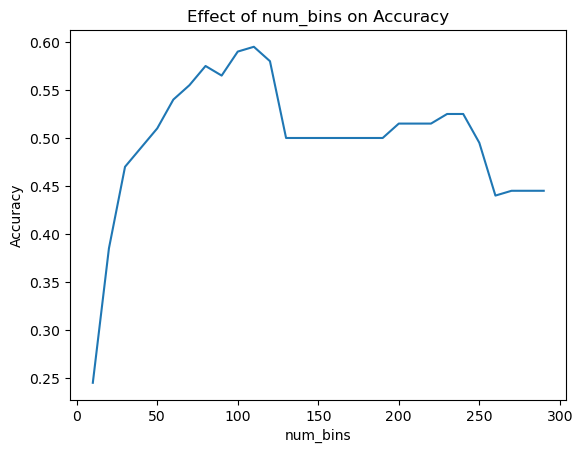

In [30]:
# Extract the accuracies and num_bins from the accuracyList_withLBP_BIN list
accuracies = [tup[0] for tup in accuracyListSVM_withLBP_BIN]
num_bins_list = [tup[1] for tup in accuracyListSVM_withLBP_BIN]

# Plot the accuracies vs. num_bins using a line plot
plt.plot(num_bins_list, accuracies)
plt.xlabel('num_bins')
plt.ylabel('Accuracy')
plt.title('Effect of num_bins on Accuracy')
plt.show()

In [31]:
data_path = './Data/s'

accuracyListSVM_withLBP_Params = []

for p in range(8, 14):
    for q in range(1, 7):
        train_data = []
        train_label = []
        test_data = []
        test_label = []

        for subject in range(1, NUM_OF_SUBJECT + 1):

            path_prefix = f'{data_path}{subject}'

            # 60% of the data is used for training and 40% for testing
            subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], best_bin, p, q,)
            subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], best_bin, p, q)

            train_data.extend(subject_train_data)
            train_label.extend(subject_train_label)
            test_data.extend(subject_test_data)
            test_label.extend(subject_test_label)

        svm = SVC(C=5.0, gamma=0.001, probability=True)
        svm.fit(train_data, train_label)

        probability_matrix = svm.predict_proba(test_data)

        # calculate accuracy
        prediction = svm.predict(test_data)
        accuracy = accuracy_score(test_label, prediction)
        accuracyListSVM_withLBP_Params.append((accuracy, p, q))

        # print(f"Accuracy: {accuracy}")

highest_accuracy_index = max(range(len(accuracyListSVM_withLBP_Params)), key=lambda i: accuracyListSVM_withLBP_Params[i][0])
best_number_of_points = accuracyListSVM_withLBP_Params[highest_accuracy_index][1]
best_radius_of_circle = accuracyListSVM_withLBP_Params[highest_accuracy_index][2]
print("highest accuacy is {}, with p of {}, and q of {}".format(accuracyListSVM_withLBP_Params[highest_accuracy_index][0], accuracyListSVM_withLBP_Params[highest_accuracy_index][1], accuracyListSVM_withLBP_Params[highest_accuracy_index][2]))

highest accuacy is 0.595, with p of 12, and q of 3


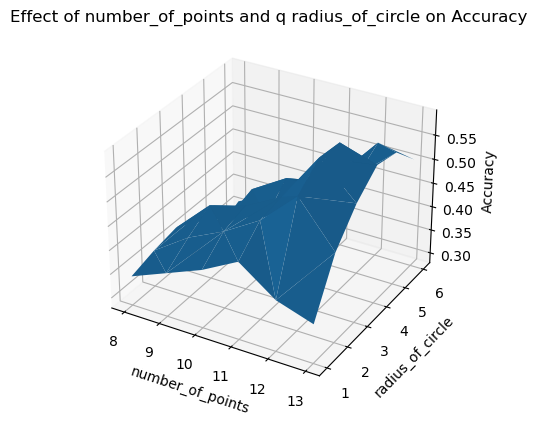

In [32]:
# Extract the accuracies, p, and q from the accuracyList_withLBP_Params list
accuracies = [tup[0] for tup in accuracyListSVM_withLBP_Params]
p_list = [tup[1] for tup in accuracyListSVM_withLBP_Params]
q_list = [tup[2] for tup in accuracyListSVM_withLBP_Params]

# Create a 3D plot of the accuracies vs. p and q
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(p_list, q_list, accuracies)
ax.set_xlabel('number_of_points')
ax.set_ylabel('radius_of_circle')
ax.set_zlabel('Accuracy')
ax.set_title('Effect of number_of_points and q radius_of_circle on Accuracy')
plt.show()

In [46]:
train_data = []
train_label = []
test_data = []
test_label = []


for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], best_bin, best_number_of_points, best_radius_of_circle)
    subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], best_bin, best_number_of_points, best_radius_of_circle)

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Only used when kernel is 'poly'
    'probability': [True]
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
grid_search.fit(train_data, train_label)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear', 'probability': True}


#### Best Model Found using SVM and LBP

In [47]:

svm = SVC(C=0.1, degree=2, gamma=1, kernel='linear', probability=True)
svm.fit(train_data, train_label)

probability_matrix = svm.predict_proba(test_data)

# calculate accuracy
prediction = svm.predict(test_data)
accuracy_LBP_gridsearch = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy_LBP_gridsearch)

Accuracy:  0.65


probability matrix


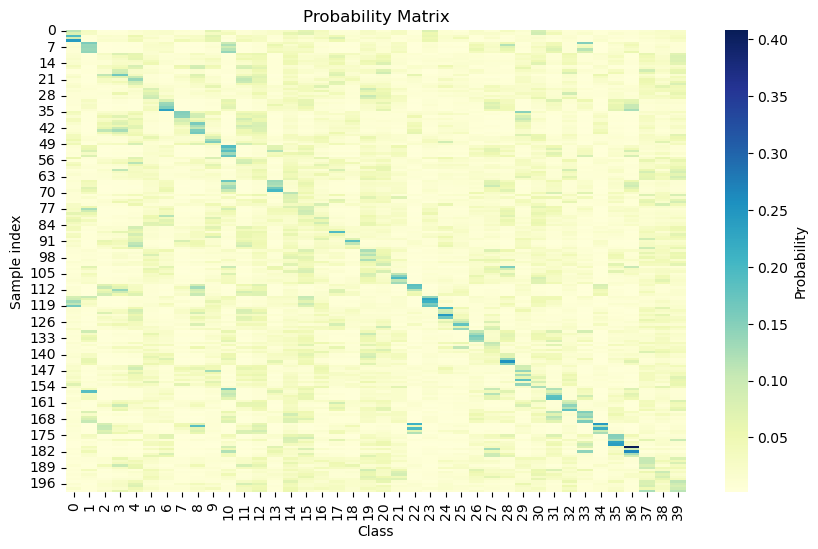

In [48]:
print("probability matrix")
plt.figure(figsize=(10, 6))
sns.heatmap(probability_matrix, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.xlabel("Class")
plt.ylabel("Sample index")
plt.title("Probability Matrix")
plt.show()

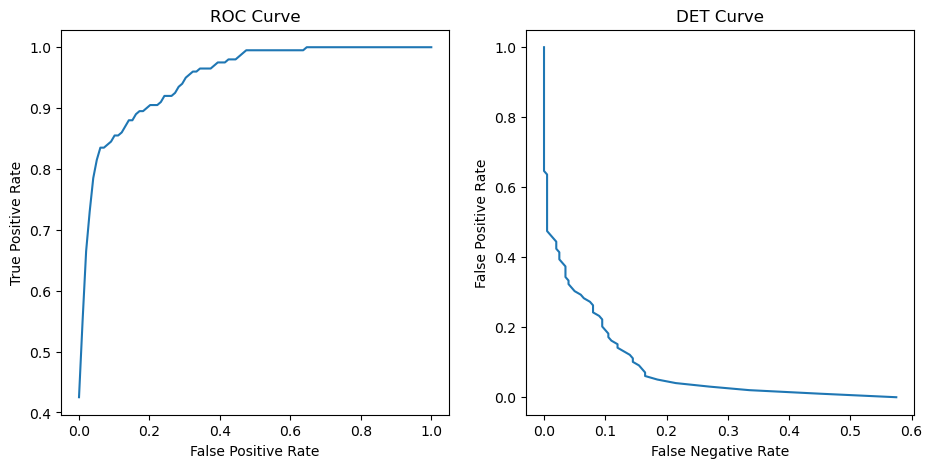

In [50]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

roc_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
roc_tpr = np.zeros((NUM_OF_SUBJECT, 100))    # true positive rate

det_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
det_fnr = np.zeros((NUM_OF_SUBJECT, 100))    # false negative rate

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Calculate binary labels for each subject
binary_labels = [np.where(np.array(test_label) == subject, 1, 0) for subject in range(1, NUM_OF_SUBJECT + 1)]

for i, subject_binary_labels in enumerate(binary_labels):
    fpr, tpr, _ = roc_curve(subject_binary_labels, probability_matrix[:, i])
    roc_fpr[i] = np.linspace(min(fpr), max(fpr), 100)
    roc_tpr[i] = np.interp(roc_fpr[i], fpr, tpr)

    fnr = 1 - tpr
    sorted_indices = np.argsort(fpr)
    sorted_fpr = fpr[sorted_indices]
    sorted_fnr = fnr[sorted_indices]
    det_fpr[i] = np.linspace(min(sorted_fpr), max(sorted_fpr), 100)
    det_fnr[i] = np.interp(det_fpr[i], sorted_fpr, sorted_fnr)

roc_mid_fpr = np.mean(roc_fpr, 0)
roc_mid_tpr = np.mean(roc_tpr, 0)
ax_roc.plot(roc_mid_fpr, roc_mid_tpr)

det_mid_fpr = np.mean(det_fpr, 0)
det_mid_fnr = np.mean(det_fnr, 0)
ax_det.plot(det_mid_fnr, det_mid_fpr)

ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve')

ax_det.set_xlabel('False Negative Rate')
ax_det.set_ylabel('False Positive Rate')
ax_det.set_title('DET Curve')

plt.show()


### SVM without LBP

In [51]:
train_data = []
train_label = []
test_data = []
test_label = []

for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery_withoutLBP(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery_withoutLBP(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

In [52]:
svm = SVC(C=5.0, gamma=0.001, probability=True)
svm.fit(train_data, train_label)

probability_matrix = svm.predict_proba(test_data)

# calculate accuracy
prediction = svm.predict(test_data)
accuracy = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.245


In [53]:
data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []


for subject in range(1, NUM_OF_SUBJECT + 1):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery_withoutLBP(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery_withoutLBP(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Only used when kernel is 'poly'
    'probability': [True]
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
grid_search.fit(train_data, train_label)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'poly', 'probability': True}


### best model found using SVM without LBP

In [54]:
svm = SVC(C=0.1, degree=4, gamma=1, kernel='poly', probability=True)
svm.fit(train_data, train_label)

probability_matrix = svm.predict_proba(test_data)

# calculate accuracy
prediction = svm.predict(test_data)
accuracy_NoLBP_gridsearch = accuracy_score(test_label, prediction)
print("Accuracy: ", accuracy_NoLBP_gridsearch)

Accuracy:  0.45


probability matrix


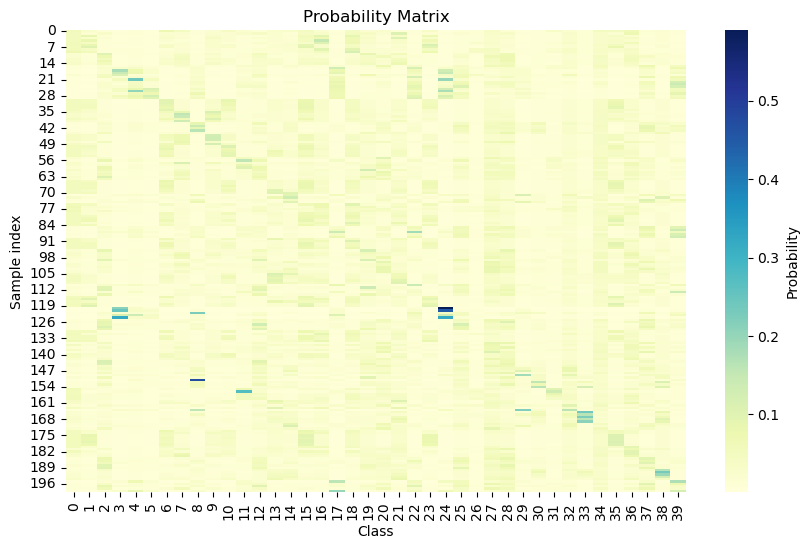

In [55]:
print("probability matrix")
plt.figure(figsize=(10, 6))
sns.heatmap(probability_matrix, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.xlabel("Class")
plt.ylabel("Sample index")
plt.title("Probability Matrix")
plt.show()

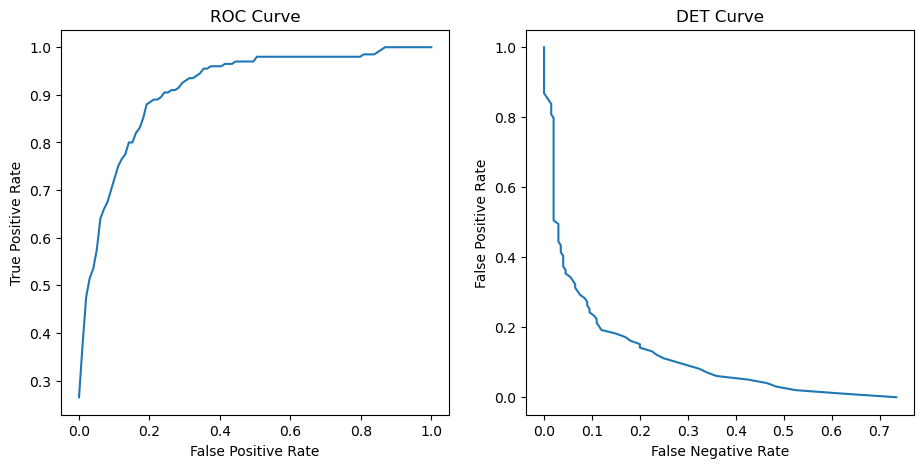

In [56]:

roc_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
roc_tpr = np.zeros((NUM_OF_SUBJECT, 100))    # true positive rate

det_fpr = np.zeros((NUM_OF_SUBJECT, 100))    # false positive rate
det_fnr = np.zeros((NUM_OF_SUBJECT, 100))    # false negative rate

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

# Calculate binary labels for each subject
binary_labels = [np.where(np.array(test_label) == subject, 1, 0) for subject in range(1, NUM_OF_SUBJECT + 1)]

for i, subject_binary_labels in enumerate(binary_labels):
    fpr, tpr, _ = roc_curve(subject_binary_labels, probability_matrix[:, i])
    roc_fpr[i] = np.linspace(min(fpr), max(fpr), 100)
    roc_tpr[i] = np.interp(roc_fpr[i], fpr, tpr)

    fnr = 1 - tpr
    sorted_indices = np.argsort(fpr)
    sorted_fpr = fpr[sorted_indices]
    sorted_fnr = fnr[sorted_indices]
    det_fpr[i] = np.linspace(min(sorted_fpr), max(sorted_fpr), 100)
    det_fnr[i] = np.interp(det_fpr[i], sorted_fpr, sorted_fnr)

roc_mid_fpr = np.mean(roc_fpr, 0)
roc_mid_tpr = np.mean(roc_tpr, 0)
ax_roc.plot(roc_mid_fpr, roc_mid_tpr)

det_mid_fpr = np.mean(det_fpr, 0)
det_mid_fnr = np.mean(det_fnr, 0)
ax_det.plot(det_mid_fnr, det_mid_fpr) 

ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('ROC Curve')

ax_det.set_xlabel('False Negative Rate') 
ax_det.set_ylabel('False Positive Rate')
ax_det.set_title('DET Curve')

plt.show()


## Comparison of all methods (4 models)

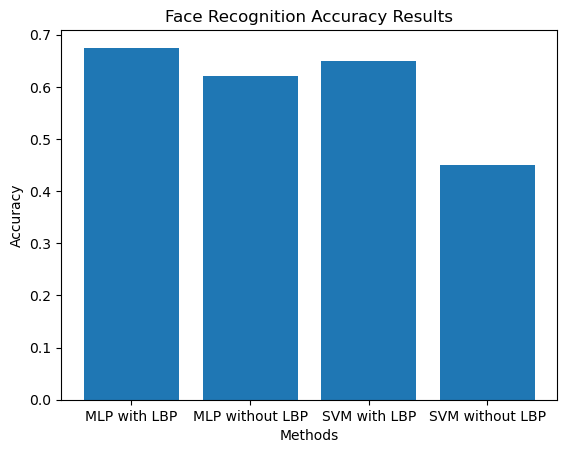

In [57]:
# comparison

# Accuracy results, using best models found (after opmitization)
accuracy_results = {
    'MLP with LBP': 0.675,
    'MLP without LBP': 0.62,
    'SVM with LBP': 0.65,
    'SVM without LBP': 0.45
}

# Prepare data for the bar graph
methods = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Create the bar graph
plt.bar(methods, accuracy_values)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Face Recognition Accuracy Results')

# Display the bar graph
plt.show()